In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import numpy as np
import h5py
import numba as nb
from numba import jit, njit
import tracerFuncs as tF
import locatingFuncs as lF

import funcs
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib as mpl

plt.style.use('fancy_plots2.mplstyle')

In [2]:
run = 2
basePath=f'/virgotng/universe/IllustrisTNG/TNG50-{run}/output'
h_const = il.groupcat.loadHeader(basePath, 99)['HubbleParam']
stellar_masses = il.groupcat.loadSubhalos(basePath, 99, fields = ['SubhaloMassType'])[:,4] * 1e10 / h_const

f = h5py.File('files/' + basePath[32:39] + '/accretion_channels_exsitu.hdf5','r')
# mw_ids = f['subhalo_ids/subhalo_ids_mws'][:]
all_ids = f['subhalo_ids/all_subhalo_ids'][:]
# inds = tF.getIndices(mw_ids, all_ids)
# gal_comp = f['galaxy_composition'][:,inds,:]

overall_fracs = f['accretion_channels/overall_fractions'][:]
print(overall_fracs)
gal_accretion_channels = f['accretion_channels/for_all_galaxies'][:,:]
print(gal_accretion_channels.shape)
print(all_ids.shape)
f.close()

stellar_masses = stellar_masses[all_ids]
print(np.where(stellar_masses == 0.))
mass_mask = np.nonzero(stellar_masses)[0]
stellar_masses = np.log10(stellar_masses[mass_mask])
gal_accretion_channels = gal_accretion_channels[mass_mask,:]
print(gal_accretion_channels.shape)

non_zero_mask = np.where(np.any(gal_accretion_channels[:,:] > 0, axis = 1))[0]
print(non_zero_mask.shape)
numBins = 15
# mass_bins, from_igm_bins, _, _ = funcs.binData_med(stellar_masses[non_zero_mask],\
#                                                        gal_accretion_channels[non_zero_mask,0], numBins)
# _, from_other_halos_bins, _, _ = funcs.binData_med(stellar_masses[non_zero_mask],\
#                                                        gal_accretion_channels[non_zero_mask,1], numBins)
# _, mergers_bins, _, _ = funcs.binData_med(stellar_masses[non_zero_mask],\
#                                                        gal_accretion_channels[non_zero_mask,2], numBins)
# _, stripped_from_halos_bins, _, _ = funcs.binData_med(stellar_masses[non_zero_mask],\
#                                                        gal_accretion_channels[non_zero_mask,3], numBins)
# _, wind_recycle_bins, _, _ = funcs.binData_med(stellar_masses[non_zero_mask],\
#                                                        gal_accretion_channels[non_zero_mask,4], numBins)
# _, nep_wind_recycle_bins, _, _ = funcs.binData_med(stellar_masses[non_zero_mask],\
#                                                        gal_accretion_channels[non_zero_mask,5], numBins)

mass_bins, from_igm_bins = funcs.binData_mean(stellar_masses[non_zero_mask],\
                                                       gal_accretion_channels[non_zero_mask,0], numBins)
_, from_other_halos_bins = funcs.binData_mean(stellar_masses[non_zero_mask],\
                                                       gal_accretion_channels[non_zero_mask,1], numBins)
_, mergers_bins = funcs.binData_mean(stellar_masses[non_zero_mask],\
                                                       gal_accretion_channels[non_zero_mask,2], numBins)
_, stripped_from_halos_bins = funcs.binData_mean(stellar_masses[non_zero_mask],\
                                                       gal_accretion_channels[non_zero_mask,3], numBins)
_, wind_recycle_bins = funcs.binData_mean(stellar_masses[non_zero_mask],\
                                                       gal_accretion_channels[non_zero_mask,4], numBins)
_, nep_wind_recycle_bins = funcs.binData_mean(stellar_masses[non_zero_mask],\
                                                       gal_accretion_channels[non_zero_mask,5], numBins)

[0.00620536 0.99379464 0.97035211 0.02084085 0.09986745 0.00235766]
(18098, 6)
(18098,)
(array([], dtype=int64),)
(18098, 6)
(18098,)


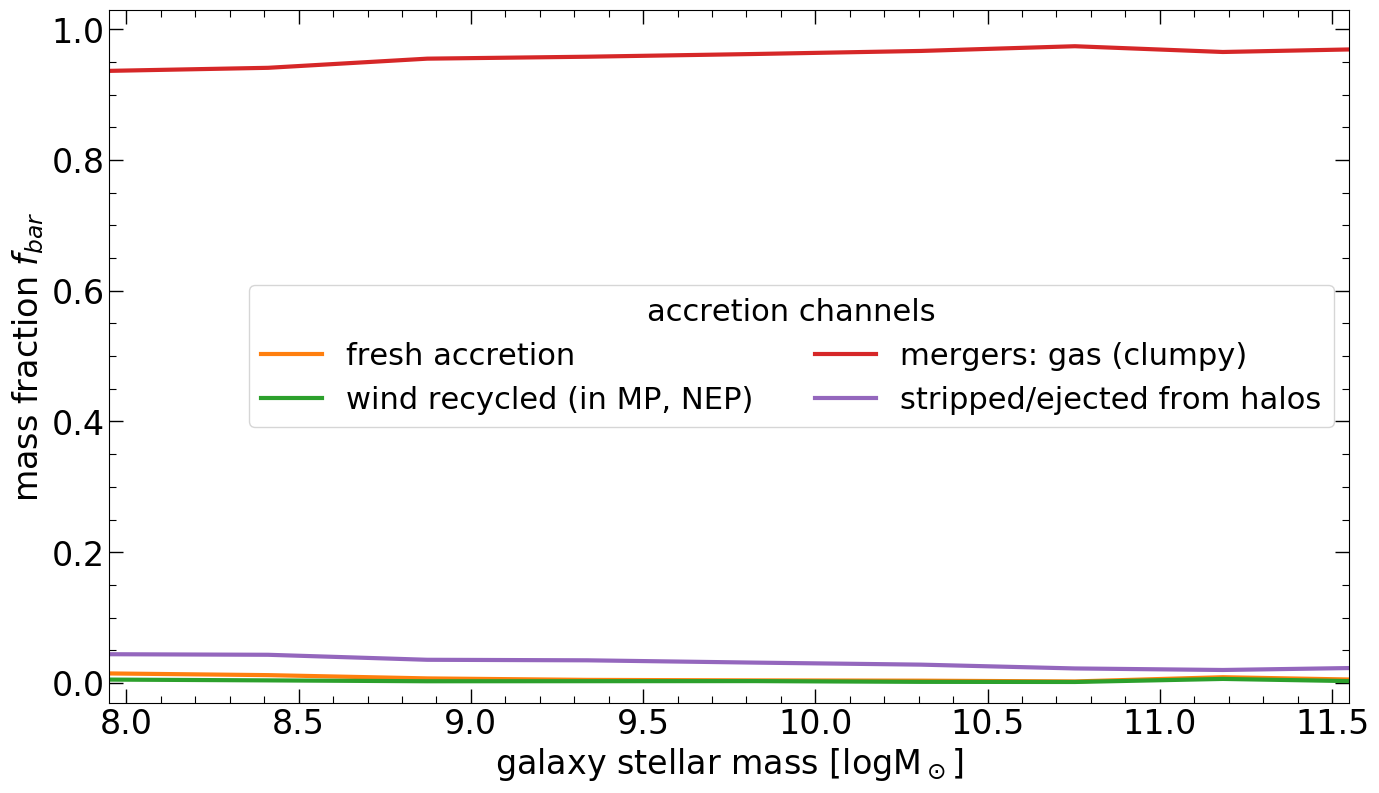

In [3]:
# plt.plot(mass_bins, from_igm_bins, color = 'tab:blue', label = 'directly from the IGM (smooth)')
# plt.plot(mass_bins, from_other_halos_bins, color = 'tab:orange', label = 'from other halos (total)')
plt.plot(mass_bins, from_igm_bins - nep_wind_recycle_bins,label = 'fresh accretion', color = 'tab:orange')
plt.plot(mass_bins, nep_wind_recycle_bins, color = 'tab:green', label = 'wind recycled (in MP, NEP)')
plt.plot(mass_bins, mergers_bins, color = 'tab:red', label = 'mergers: gas (clumpy)')
plt.plot(mass_bins, stripped_from_halos_bins, color = 'tab:purple', label = 'stripped/ejected from halos')
# plt.plot(mass_bins, wind_recycle_bins, color = 'tab:purple', label = 'wind recycled (in MP, total)')
# plt.plot(mass_bins, from_igm_bins + mergers_bins + stripped_from_halos_bins, color = 'black')

plt.legend(title = 'accretion channels', fontsize = 22, ncol = 2)
plt.xlabel(r'galaxy stellar mass [$\log \rm{M}_\odot$]')
plt.ylabel('mass fraction $f_{bar}$')
plt.xlim(7.95,11.55)

plt.ylim(-0.03,1.03)
# plt.savefig(f'pics/accretion_channels/accretion_50-{run}_exsitu.pdf', format = 'pdf')
plt.show()